# Objective (Part-1)

Perform an in-depth exploratory data analysis (EDA) on a dataset to identify trends, patterns, anomalies, and factors influencing performance.

---



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df= pd.read_csv('/content/superstore.csv')

# Display the few rows

---



In [3]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [4]:
df.tail()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52
51289,Office Supplies,Los Angeles,United States,FH-143654,Fred Hopkins,0.2,US,1,2014-12-26 00:00:00.000,CA-2014-121398,...,154,Corporate,2014-12-30 00:00:00.000,Standard Class,9.59,California,Binders,2014,North America,52


# Basic information about the dataset And Clean the Data

---



In [5]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales    

In [6]:
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [8]:
df.rename(columns={"记录数":"Number of Records"}, inplace=True) #rename column name

df["Number of Records"].head()

,Number of Records
0,1
1,1
2,1
3,1
4,1


# Check for duplicates

---



In [10]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


# Handle missing values

---



In [11]:
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

Missing values before cleaning:
Category             0
City                 0
Country              0
Customer.ID          0
Customer.Name        0
Discount             0
Market               0
Number of Records    0
Order.Date           0
Order.ID             0
Order.Priority       0
Product.ID           0
Product.Name         0
Profit               0
Quantity             0
Region               0
Row.ID               0
Sales                0
Segment              0
Ship.Date            0
Ship.Mode            0
Shipping.Cost        0
State                0
Sub.Category         0
Year                 0
Market2              0
weeknum              0
dtype: int64


# Statistical summary of numerical columns

---



In [9]:
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,Discount,Number of Records,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


# Convert 'Date' column to datetime format and verify

In [12]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [13]:
# Create a new column for processing time
df['Processing.Time'] = (df['Ship.Date'] - df['Order.Date']).dt.days

# Detect and handle outliers using statistical techniques (e.g., IQR or Z-scores).

Handleing outliers using IQR Technique
---



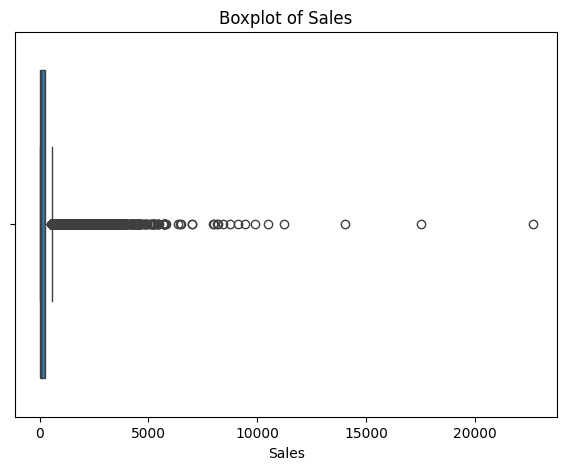

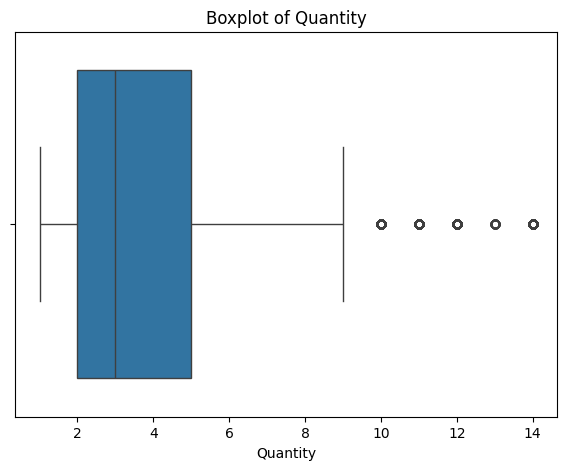

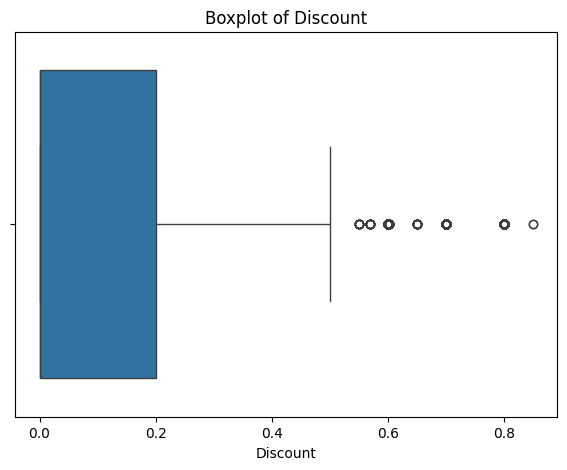

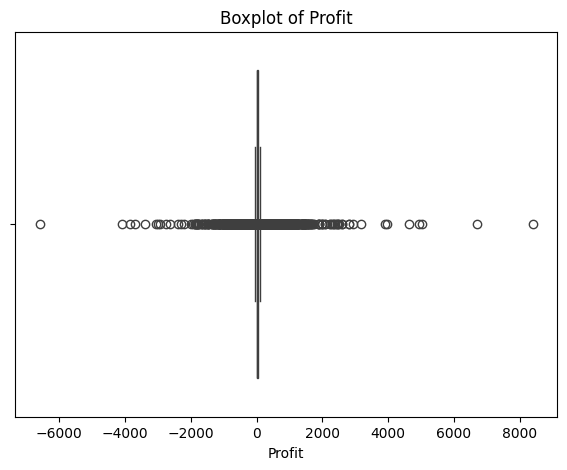

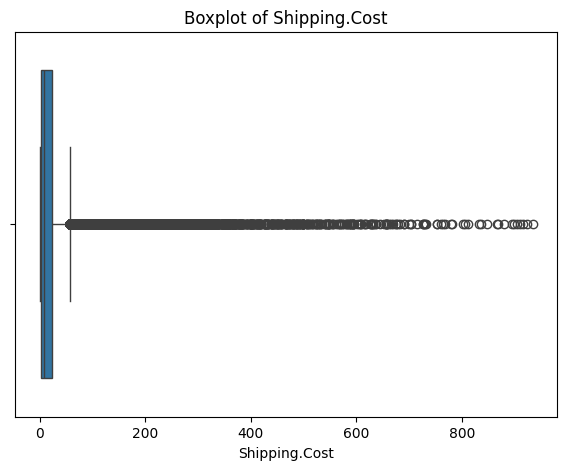

In [15]:
# List of continuous numerical columns
continuous_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping.Cost']

# Create boxplots for each continuous variable
for column in continuous_columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

In [16]:
df.describe()

,Discount,Number of Records,Order.Date,Profit,Quantity,Row.ID,Sales,Ship.Date,Shipping.Cost,Year,weeknum,Processing.Time
count,51290.000000,51290.0,51290,51290.000000,51290.000000,51290.00000,51290.000000,51290,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,2013-05-11 21:26:49.155780864,28.610982,3.476545,25645.50000,246.498440,2013-05-15 20:42:42.745174784,26.375818,2012.777208,31.287112,3.969370
min,0.000000,1.0,2011-01-01 00:00:00,-6599.978000,1.000000,1.00000,0.000000,2011-01-03 00:00:00,0.002000,2011.000000,1.000000,0.000000
25%,0.000000,1.0,2012-06-19 00:00:00,0.000000,2.000000,12823.25000,31.000000,2012-06-23 00:00:00,2.610000,2012.000000,20.000000,3.000000
50%,0.000000,1.0,2013-07-08 00:00:00,9.240000,3.000000,25645.50000,85.000000,2013-07-12 00:00:00,7.790000,2013.000000,33.000000,4.000000
75%,0.200000,1.0,2014-05-22 00:00:00,36.810000,5.000000,38467.75000,251.000000,2014-05-26 00:00:00,24.450000,2014.000000,44.000000,5.000000
max,0.850000,1.0,2014-12-31 00:00:00,8399.976000,14.000000,51290.00000,22638.000000,2015-01-07 00:00:00,933.570000,2014.000000,53.000000,7.000000
std,0.212280,0.0,NaN,174.340972,2.278766,14806.29199,487.567175,NaN,57.296810,1.098931,14.429795,1.729437


# Calculate Q1, Q3, and IQR

In [19]:

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
iqr_outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

print("Outliers in 'Sales' (using IQR Technique):")
iqr_outliers

Outliers in 'Sales' (using IQR Technique):


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Number of Records,Order.Date,Order.ID,...,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,Processing.Time
196,Office Supplies,Los Angeles,United States,RS-197654,Roland Schwarz,0.0,US,1,2011-12-06,CA-2011-106726,...,Corporate,2011-12-08,First Class,506.49,California,Storage,2011,North America,50,2
201,Office Supplies,Los Angeles,United States,DE-132554,Deanra Eno,0.0,US,1,2012-04-18,CA-2012-142601,...,Home Office,2012-04-20,Second Class,36.83,California,Storage,2012,North America,16,2
221,Office Supplies,Los Angeles,United States,PF-192254,Phillip Flathmann,0.0,US,1,2013-11-04,CA-2013-114972,...,Consumer,2013-11-07,First Class,364.76,California,Appliances,2013,North America,45,3
226,Office Supplies,Los Angeles,United States,AI-108554,Arianne Irving,0.0,US,1,2013-11-11,CA-2013-158694,...,Consumer,2013-11-14,Second Class,105.59,California,Storage,2013,North America,46,3
231,Office Supplies,Los Angeles,United States,SC-207254,Steven Cartwright,0.0,US,1,2014-03-22,CA-2014-108539,...,Consumer,2014-03-24,Second Class,58.05,California,Storage,2014,North America,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51177,Technology,Los Angeles,United States,BT-115304,Bradley Talbott,0.2,US,1,2014-02-27,CA-2014-117212,...,Home Office,2014-03-01,Second Class,78.76,California,Phones,2014,North America,9,2
51185,Technology,Los Angeles,United States,FA-142304,Frank Atkinson,0.2,US,1,2014-09-25,CA-2014-122364,...,Corporate,2014-09-30,Standard Class,73.69,California,Phones,2014,North America,39,5
51256,Office Supplies,Los Angeles,United States,TG-213104,Toby Gnade,0.2,US,1,2013-11-16,CA-2013-146633,...,Consumer,2013-11-18,Second Class,363.87,California,Binders,2013,North America,46,2
51271,Office Supplies,Los Angeles,United States,WB-218504,William Brown,0.2,US,1,2014-06-30,CA-2014-138149,...,Consumer,2014-07-01,First Class,337.16,California,Binders,2014,North America,27,1


# Handleing outliers using Z-scores Technique

---



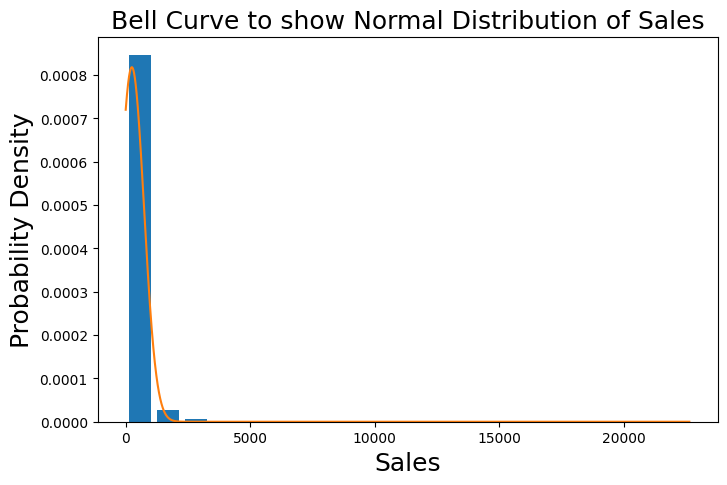

In [32]:
plt.figure(figsize=(8,5))

plt.hist(df.Sales, bins=20 , rwidth=.8 , density=True)
plt.xlabel('Sales', fontsize=18)
plt.ylabel('Probability Density' , fontsize=18)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
plt.title('Bell Curve to show Normal Distribution of Sales', fontsize=18)

rng = np.arange(df['Sales'].min() , df['Sales'].max() , .1)
plt.plot(rng , norm.pdf(rng , df.Sales.mean() , df.Sales.std() ))

# Creating new column z-scores

In [33]:

df['z-scores'] = (df['Sales']  -  df['Sales'].mean()) / df['Sales'].std()

# Define bounds
lower_limit = df['Sales'].mean() - 3*df['Sales'].std()
upper_limit = df['Sales'].mean() + 3*df['Sales'].std()

# Find outliers
z_score_outliers = df[(df['Sales'] < lower_limit) | (df['Sales'] > upper_limit)]

print("Outliers in 'Sales' (using Z-scores Technique):")
z_score_outliers

Outliers in 'Sales' (using Z-scores Technique):


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Number of Records,Order.Date,Order.ID,...,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,Processing.Time,z-scores
361,Office Supplies,San Francisco,United States,KL-166454,Ken Lonsdale,0.0,US,1,2011-07-25,CA-2011-143917,...,2011-07-27,Second Class,16.77,California,Supplies,2011,North America,31,2,16.288015
417,Office Supplies,San Francisco,United States,EH-137654,Edward Hooks,0.0,US,1,2013-03-14,CA-2013-136301,...,2013-03-16,Second Class,56.09,California,Supplies,2013,North America,11,2,9.570992
663,Office Supplies,Burbank,United States,SC-200504,Sample Company A,0.0,US,1,2011-03-18,US-2011-131275,...,2011-03-24,Standard Class,93.90,California,Storage,2011,North America,12,6,3.301087
803,Office Supplies,Brentwood,United States,RW-195404,Rick Wilson,0.0,US,1,2014-08-18,CA-2014-166093,...,2014-08-25,Standard Class,173.07,California,Appliances,2014,North America,34,7,4.658848
1137,Office Supplies,New York City,United States,JD-161504,Justin Deggeller,0.0,US,1,2014-11-20,CA-2014-168858,...,2014-11-24,Standard Class,235.83,New York,Appliances,2014,North America,47,4,4.632185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51097,Technology,Los Angeles,United States,PS-190454,Penelope Sewall,0.2,US,1,2014-05-09,CA-2014-133865,...,2014-05-13,Standard Class,400.60,California,Copiers,2014,North America,19,4,6.385790
51116,Technology,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25,CA-2014-145219,...,2014-12-26,First Class,334.15,California,Copiers,2014,North America,52,1,5.401310
51153,Technology,Los Angeles,United States,KF-162854,Karen Ferguson,0.2,US,1,2013-03-11,CA-2013-159016,...,2013-03-12,First Class,714.66,California,Phones,2013,North America,11,1,8.024538
51173,Technology,Los Angeles,United States,GK-146204,Grace Kelly,0.2,US,1,2013-12-26,US-2013-116729,...,2013-12-29,First Class,429.66,California,Phones,2013,North America,52,3,4.777806


# Removing outliers

In [34]:

df = df[abs(df['z-scores']) <= 3]
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Number of Records,Order.Date,Order.ID,...,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,Processing.Time,z-scores
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07,CA-2011-130813,...,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2,2,-0.466599
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21,CA-2011-148614,...,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4,5,-0.466599
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32,4,-0.462497
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32,4,-0.277907
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29,CA-2011-146969,...,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40,4,-0.493262


In [36]:
# Removing z-score column
df = df.drop('z-scores', axis=1)

# Statistical Analysis

---



In [37]:
print("\nMean Sales:", df['Sales'].mean())
print("\nMedian Sales:", df['Sales'].median())
print("\nStandard Deviation of Sales:", df['Sales'].std())
print("\nVariance of Sales:", df['Sales'].var())


Mean Sales: 197.01402398997433

Median Sales: 82.0

Standard Deviation of Sales: 282.05681937464374

Variance of Sales: 79556.0493557404


# Correlation matrix

---



In [39]:

correlation_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping.Cost']].corr()
correlation_matrix

,Sales,Profit,Quantity,Discount,Shipping.Cost
Sales,1.000000,0.315983,0.301236,-0.103381,0.786136
Profit,0.315983,1.000000,0.064802,-0.427714,0.259463
Quantity,0.301236,0.064802,1.000000,-0.014058,0.231562
Discount,-0.103381,-0.427714,-0.014058,1.000000,-0.081376
Shipping.Cost,0.786136,0.259463,0.231562,-0.081376,1.000000


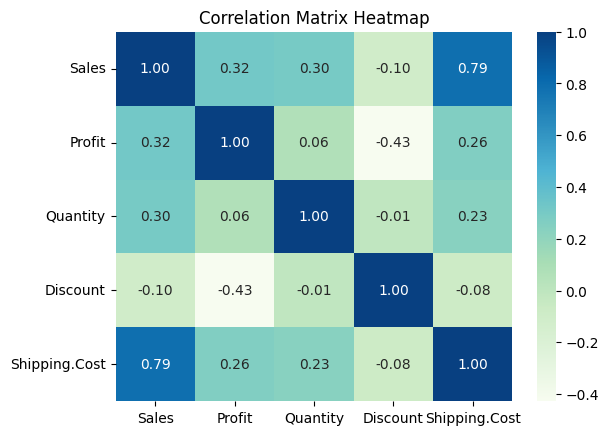

In [40]:
sns.heatmap(correlation_matrix, annot=True, cmap="GnBu", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# How Sales affects Profit

---



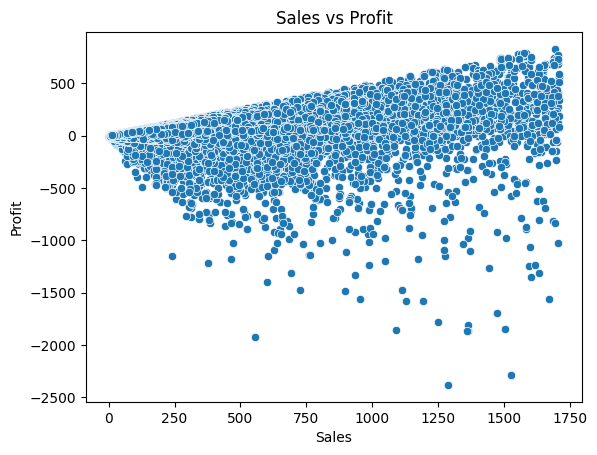

In [41]:
sns.scatterplot(x=df['Sales'], y=df['Profit'])
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


# Segment-wise Analysis

---



<Axes: ylabel='Segment'>

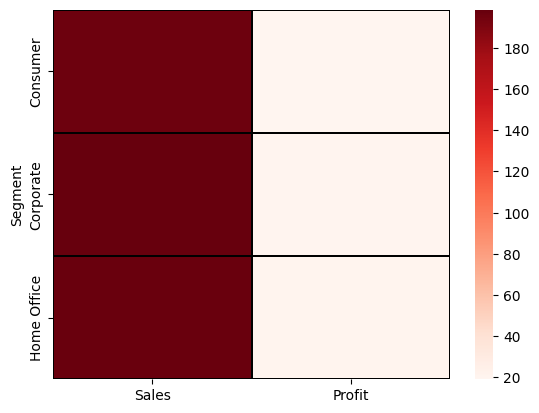

In [42]:

segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].mean()
sns.heatmap(segment_analysis, cmap='Reds', linecolor='Black', linewidth=.005)


# Monthly Sales Trend

---



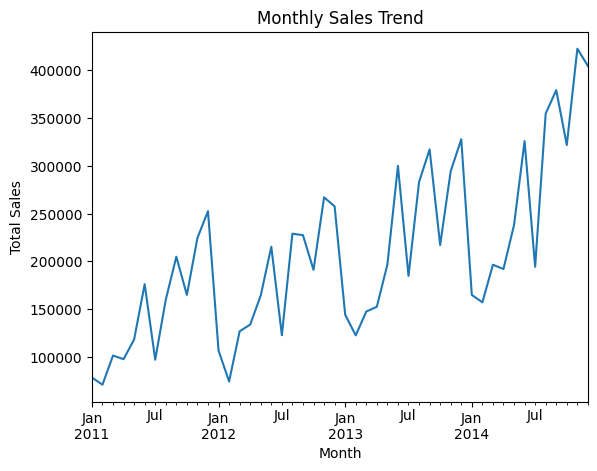

In [48]:
monthly_sales = df.groupby(df['Order.Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()